# redshift: z = 0.024

In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW_Z import NFW_Z

Remember: 500 solar masses is the mass per particle

In [2]:
bin_size = 0.02 # tis in kpc
starting_radius = 0.02 # tis in kpc

# THIS PART WORKS WITH NO RADIATIVE TRANSFER (NO RT)

In [3]:
전data300_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 2 no RT/dwarf_dm_7e8_0300.txt")

In [4]:
dx300_noRT = 전data300_noRT[:,4] / 1000 # converting pc to kpc
dy300_noRT = 전data300_noRT[:,5] / 1000 # converting pc to kpc
dz300_noRT = 전data300_noRT[:,6] / 1000 # converting pc to kpc
r300_noRT = np.sqrt(dx300_noRT**2 + dy300_noRT**2 + dz300_noRT**2) # max closest to 9.76 kpc
rad_array300_noRT = np.arange(starting_radius, 9.76, bin_size) # unit: kpc

density_profile300_noRT = np.zeros(np.size(rad_array300_noRT))
i = 0
for radius_value in rad_array300_noRT:
    particles = np.where((r300_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + bin_size)**3)
    density_profile300_noRT[i] = how_many_particles / shell_volume * 500
    i += 1

In [5]:
mass_profile300_noRT = np.zeros(np.size(rad_array300_noRT))
h = 0
for radius_value in rad_array300_noRT:
    particles = np.where((r300_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_profile300_noRT[h] = how_many_particles * 500
    h += 1

## generating 2 NFW profiles with 2 different masses.
## the one called "halo6" will be the main one running.

In [6]:
# the mass equals to the mass of the last data point that Jeon collected.

halo6 = NFW_Z(mass_profile300_noRT[np.size(mass_profile300_noRT) - 1]) # NFW using total mass of the dwarf in the data file
r_s6 = halo6.r_s(0.024)
c_vir6 = halo6.c_vir(0.024)
print('r_s =', r_s6)
print('c_vir =', c_vir6)

r_s = 0.7733865908950253
c_vir = 18.77600404199019


In [7]:
# the mass is made up by Dr Besla to estimate m_vir

halo6_1 = NFW_Z(1.72e8) # NFW using M_200 / 0.87
r_s6_1 = halo6_1.r_s(0.024)
c_vir6_1 = halo6_1.c_vir(0.024)
print('r_s =', r_s6_1)
print('c_vir =', c_vir6_1)

r_s = 0.7557282912123585
c_vir = 18.855827255165977


In [10]:
'''this is to set in stone some of the variables we'll use later'''

# this finds density that best corresponds to the critical density
rho_crit = halo6.rho_crit(0.024) 
deviation_from_rho_crit = abs(density_profile300_noRT - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
rad_at_rho_crit = rad_array300_noRT[index][0]

# this defines the NFW profile
density_profile6 = halo6.rho(0.024, rad_array300_noRT)
density_profile6_1 = halo6_1.rho(0.024, rad_array300_noRT)

## plotting the AVERAGE density profile at this redshift (unnormalized)

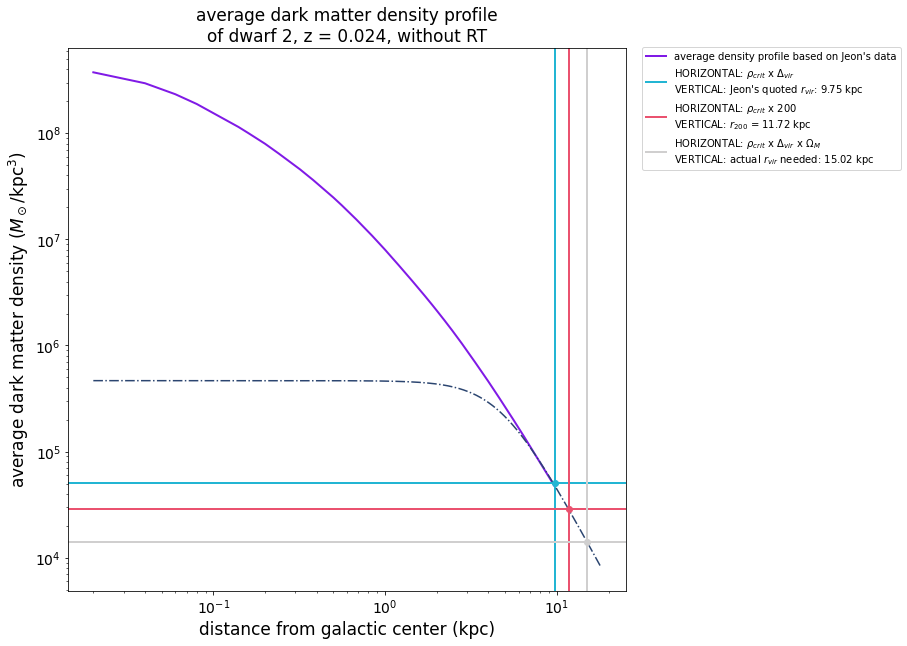

In [42]:
'''1. PLOT THE DENSITY PROFILE AND LINES BASED ON JEON'S DATA'''
fig, ax = plt.subplots(figsize=[10, 10])
plt.plot(rad_array300_noRT, density_profile300_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=2, \
         label="average density profile based on Jeon's data")

plt.axhline(rho_crit * halo6.delta_vir(0.024), color='#23B5D3', linewidth=2, \
           label="HORIZONTAL: $ρ_{crit}$ x $Δ_{vir}$" + \
            "\nVERTICAL: Jeon's quoted $r_{vir}$: " + str(round(9.752054e+03 * 0.001, 2)) + ' kpc') # CYAN
plt.axvline(9.752054e+03 * 0.001, color='#23B5D3', linewidth=2) # CYAN

'''2. PLOT THE APPROXIMATION IN ORDER TO EXTEND THE DENSITY PROFILE PLOTS FURTHER,
UNTIL IT MEETS ρ_crit x Δ_vir x Omega_M. THE RADIUS WHERE THE MEETING HAPPENS
IS GOING TO BE CALLED rad_rdo'''
extended_array = np.arange(starting_radius, 18, bin_size)
extended_density_prof = 10**7.69/(x**3+105)
plt.plot(extended_array, extended_density_prof, color='#2B4570', linestyle='-.')

'''3. PLOT THE DENSITY AND CORRESPONDING RADIUS THAT'S CLOSEST
TO 200 TIMES THE CRITICAL DENSITY (rho_crit)'''
density200 = rho_crit * 200
deviate = abs(extended_density_prof - density200)
ind = np.where(deviate == min(deviate))
rad200 = extended_array[ind][0]
plt.axhline(density200, color='#EA526F', linewidth=2, \
           label="HORIZONTAL: $ρ_{crit}$ x 200" + "\nVERTICAL: $r_{200}$ = " + str(round(rad200, 2)) + " kpc") # RED
plt.axvline(rad200, color='#EA526F', linewidth=2) # RED

'''4. FIND AND THEN PLOT rad_RDO'''
rho_delta_omega = rho_crit * halo6.delta_vir(0.024) * halo6.OmegaM_Z(0.024)
difference = abs(extended_density_prof - rho_delta_omega)
where = np.where(difference == min(difference))
rad_rdo = x[where][0]
plt.axhline(rho_delta_omega, color='#D0CFCF', linewidth=2, \
           label="HORIZONTAL: $ρ_{crit}$ x $Δ_{vir}$ x $\Omega_{M}$" + \
           '\nVERTICAL: actual $r_{vir}$ needed: ' + str(rad_rdo) + ' kpc') # GREY
plt.axvline(rad_rdo, color='#D0CFCF', linewidth=2) # GREY

'''5. PLOT ALL THE POINTS OF INTERSECTION'''
plt.plot(9.752054e+03 * 0.001, rho_crit * halo6.delta_vir(0.024), 'o', color='#23B5D3') # CYAN
plt.plot(rad200, density200, 'o', color='#EA526F') # RED
plt.plot(rad_rdo, rho_delta_omega, 'o', color='#D0CFCF') # GREY

'''6. THESE ARE FOR THE LEGENDS AND THE REST'''
plt.legend(bbox_to_anchor=(1.02, 1.01), loc='upper left')
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('average dark matter density ($M_\odot$/kpc$^3$)', fontsize=17) # using LATEX here!
plt.title('average dark matter density profile\nof dwarf 2, z = 0.024, without RT', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

'''LO AND BEHOLD!'''
plt.show()